In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

 

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# the columns in the dataset
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Sex

In [7]:
#to find the number of quantity in each category
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

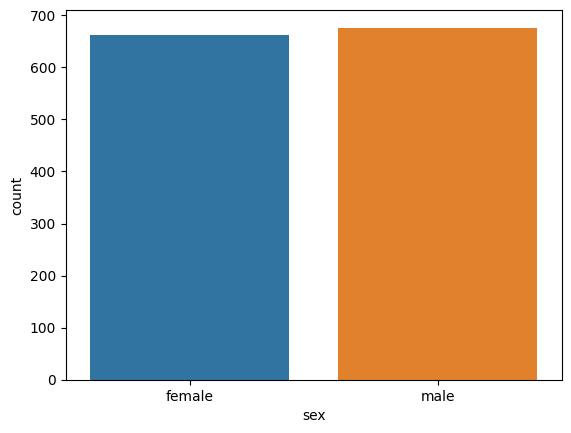

In [8]:
#plotting a countplot
sns.countplot(x='sex',data=data)
plt.show()

# Age

In [9]:
#To Check the diffrent ages present in the age column
data['age'].nunique()

47

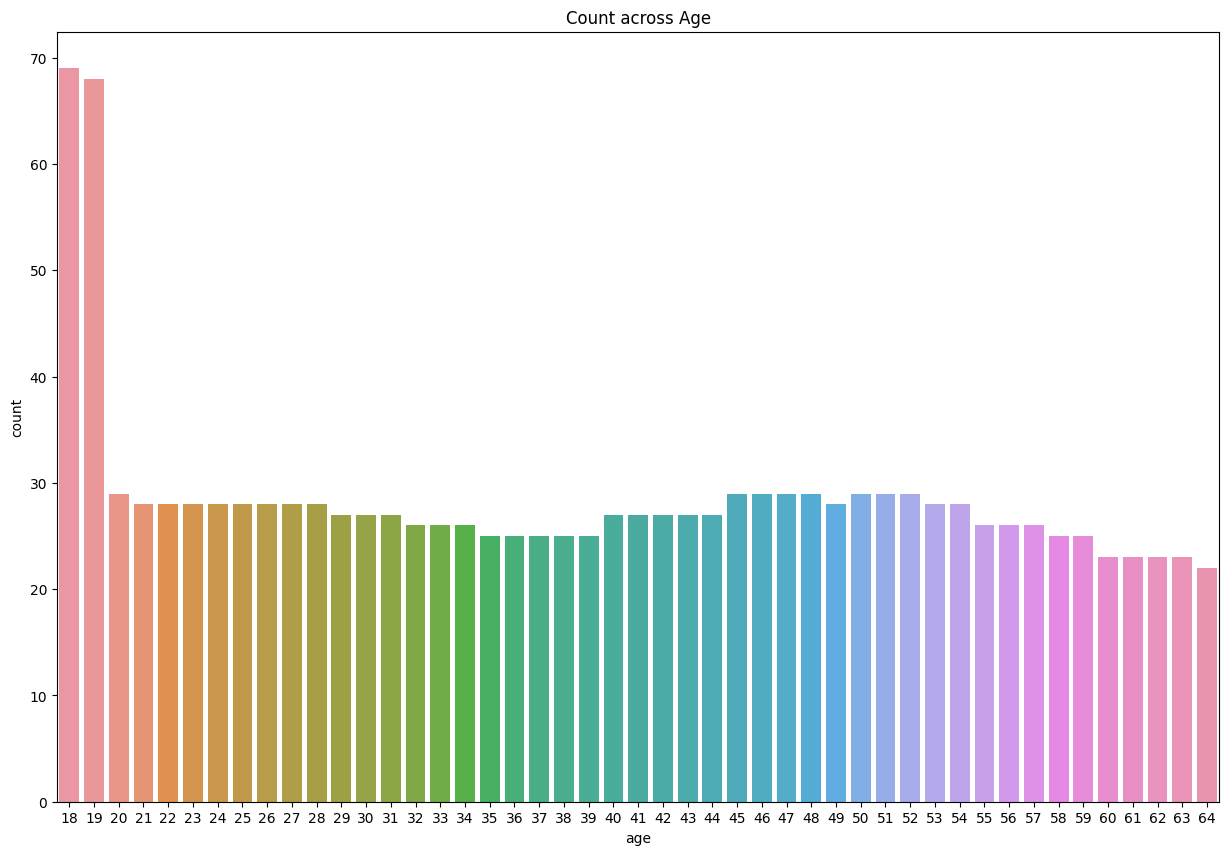

In [10]:
#plotting countplot for the age feature
plt.figure(figsize=(15,10))
sns.countplot(x='age',data=data)
plt.title('Count across Age')
plt.show()

# BMI

In [11]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

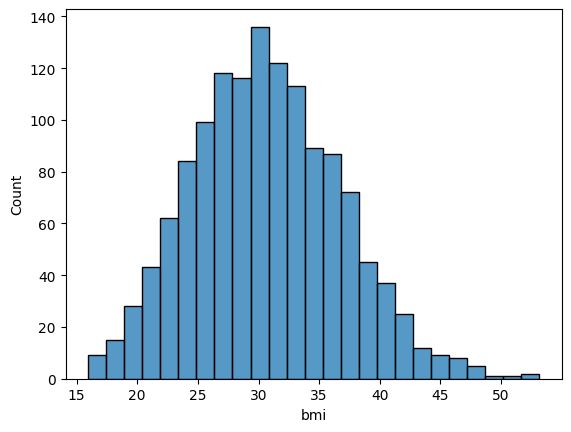

In [12]:
sns.histplot(data['bmi'])
plt.show()

# Children 

In [13]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

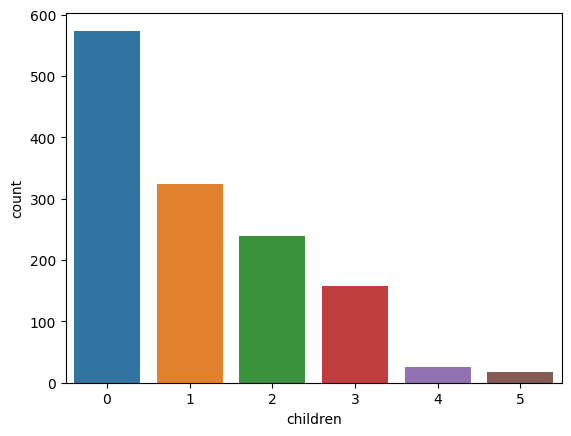

In [14]:
#plotting countplot
sns.countplot(x = 'children',data = data)
plt.show()

# Smoker

In [15]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

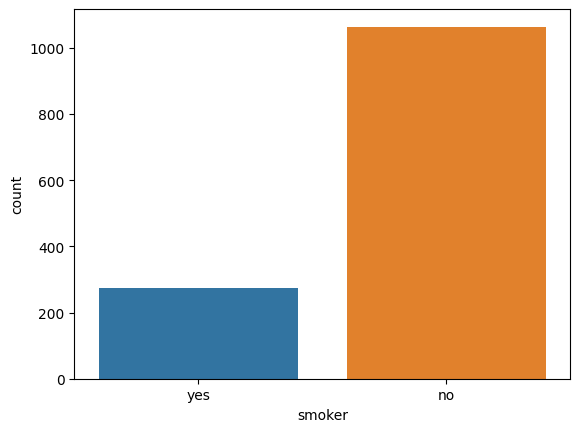

In [16]:
sns.countplot(x = 'smoker', data = data)
plt.show()

# Region

In [17]:
r=data['region'].value_counts()

In [18]:
r

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

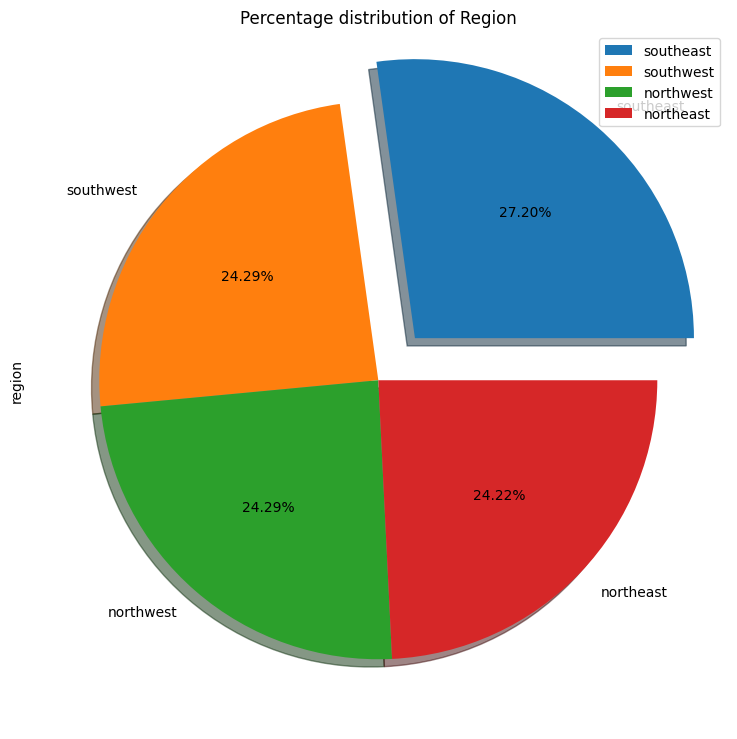

In [19]:
#plotting pie chart of the region feature
plt.figure(figsize=(9,9.5))
data['region'].value_counts().plot(kind='pie',explode=[0.2,0,0,0],legend=True,autopct='%.2f%%',shadow=True)
plt.title('Percentage distribution of Region')
plt.show()

# Output

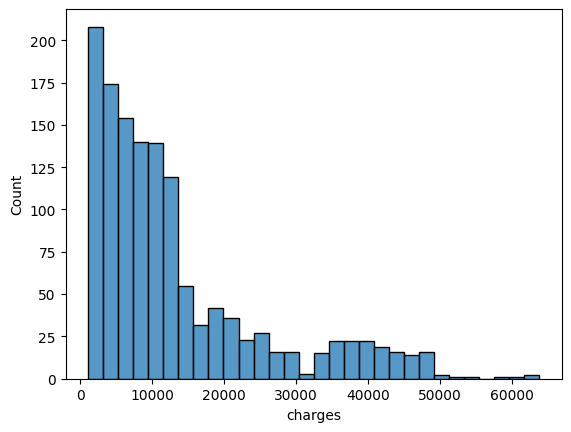

In [20]:
#plotting a distributionplot for the target variable charges
sns.histplot(data['charges'])
plt.show()

In [21]:
data = data.apply(LabelEncoder().fit_transform)   # convert all categorical values to numeric

In [22]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

In [23]:
X     # add bias term in X

,age,sex,bmi,children,smoker,region
0,1,0,197,0,1,3
1,0,1,350,1,0,2
2,10,1,331,3,0,2
3,15,1,73,0,0,1
4,14,1,223,0,0,1
...,...,...,...,...,...,...
1333,32,1,276,3,0,1
1334,0,0,302,0,0,0
1335,0,0,422,0,0,2
1336,3,0,146,0,0,3


In [24]:
X['bias'] = np.ones(X.shape[0], dtype = 'int32')

In [25]:
X

,age,sex,bmi,children,smoker,region,bias
0,1,0,197,0,1,3,1
1,0,1,350,1,0,2,1
2,10,1,331,3,0,2,1
3,15,1,73,0,0,1,1
4,14,1,223,0,0,1,1
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,1
1334,0,0,302,0,0,0,1
1335,0,0,422,0,0,2,1
1336,3,0,146,0,0,3,1


In [26]:
Y

,charges
0,1005
1,57
2,306
3,1097
4,254
...,...
1333,746
1334,118
1335,32
1336,91


In [27]:
scalar = MinMaxScaler()        # normalization
X = scalar.fit_transform(X)

In [28]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [29]:
X_Train.shape

(936, 7)

In [30]:
Y_Train.shape

(936, 1)

In [31]:
def model(X,Y,LearningRate,Iterations):
    
    M = Y.shape[0]    # 936
    theta = np.zeros((X.shape[1],1))      #   shape is 7 x 1
    
    costs = []
    accuracies = []
    
    for i in range(0,Iterations):
        
        Y_Predicted = np.dot(X,theta)   # 936x7  7x1  = 936x1
        
        cost = np.sum( np.square(Y_Predicted - Y  ) ) / (2*M)     # cost function
        costs.append(cost)
        accuracies.append(r2_score(Y,Y_Predicted))
        
        dTheta = np.dot( X.T , Y_Predicted - Y ) / M
        
        theta = theta - LearningRate * dTheta
        
        if(i%(Iterations/100) == 0):
                print("Cost is :", cost)
    
    return theta, costs, accuracies

In [32]:
def predict(theta,X):
    return np.dot(X,theta)

In [33]:
def PrintOutput(Y,Pred):
    
    Y = np.array(Y)    # indexes of y are in random manner

    for i in range(0,Y.shape[0]):
    
        print(  "Actual price: ", Y[i] , "Predicted price: ", Pred[i] )

In [34]:
learnRate = 0.0001
iterations = 100000

In [ ]:
Thetas, Costs, Accuracies = model(X_Train,Y_Train,learnRate,iterations)

In [36]:
Thetas

array([[580.70577   ],
       [ 68.95849727],
       [290.85483145],
       [186.90587841],
       [553.39805002],
       [101.65058619],
       [  0.        ]])

In [37]:
Costs = np.array(Costs, dtype = 'float64')
Costs = Costs.ravel()
Accuracies = np.array(Accuracies, dtype = 'float64')
Accuracies = Accuracies.ravel()

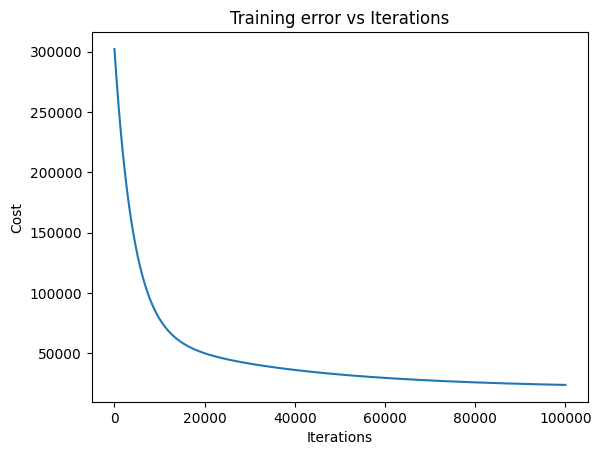

In [38]:
plt.plot(np.arange(iterations),Costs)
plt.title("Training error vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

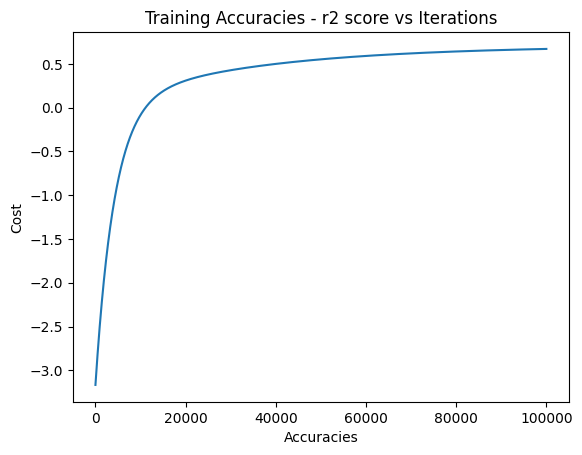

In [39]:
plt.plot(np.arange(iterations),Accuracies)
plt.title("Training Accuracies - r2 score vs Iterations")
plt.xlabel("Accuracies")
plt.ylabel("Cost")
plt.show()

In [40]:
Predictions = predict(Thetas,X_Test)

In [41]:
Predictions = Predictions.ravel()

In [42]:
Predictions

array([ 233.3815392 ,  522.24095055,  655.88144233,  802.17789489,
        819.91525274, 1079.490528  ,  719.41497843,  191.93561491,
       1339.99106591,  373.22238957,  859.87839877,  375.88953392,
        554.50933443,  292.15597679, 1263.82786875,  382.39464778,
       1451.19895339, 1245.90270508,  465.69762921,  434.85127309,
        477.01456572,  429.44697264,  726.82218823,  762.63103026,
        646.68579243, 1177.48317902, 1181.42190413,  761.0891387 ,
        681.3467195 ,  537.18677775,  807.1824323 ,  801.18298503,
        199.48857903,  660.42460458,  591.18636506,  305.52315634,
        709.19285263,  736.70999417,  709.2851231 ,  868.43387346,
        424.6289771 ,  308.44828845,   94.09779227,  358.45819529,
        178.12864449,  901.82955711,  653.86005024, 1462.19645386,
        444.77152891, 1510.42227924, 1001.53396622, 1171.88037737,
        220.98266535,  494.7631624 ,  845.55402681,  461.97062919,
        195.87872139,  474.39180783,  331.33774543,  676.80012

In [43]:
PrintOutput(Y_Test,Predictions)

Actual price:  [63] Predicted price:  233.3815391958952
Actual price:  [666] Predicted price:  522.2409505467895
Actual price:  [447] Predicted price:  655.8814423308693
Actual price:  [778] Predicted price:  802.177894890195
Actual price:  [645] Predicted price:  819.9152527436074
Actual price:  [1047] Predicted price:  1079.4905279991572
Actual price:  [614] Predicted price:  719.4149784288752
Actual price:  [172] Predicted price:  191.93561491021663
Actual price:  [1301] Predicted price:  1339.9910659133895
Actual price:  [261] Predicted price:  373.2223895720989
Actual price:  [894] Predicted price:  859.8783987656425
Actual price:  [229] Predicted price:  375.88953392451265
Actual price:  [463] Predicted price:  554.5093344274773
Actual price:  [32] Predicted price:  292.1559767888808
Actual price:  [1263] Predicted price:  1263.827868754286
Actual price:  [1158] Predicted price:  382.39464778123
Actual price:  [1304] Predicted price:  1451.198953389367
Actual price:  [1159] Predi

In [44]:
print("Cost: " , np.sum( np.square(Predictions - np.array(Y_Test)  ) ) / (2* Y_Test.shape[0]))

Cost:  50602486.62320033


In [45]:
def cust():
    age = input("Enter Age :")
    sex = input("Enter sex(0-male,1-female):")
    bmi = input("Enter bmi:")
    children = input("Enter number of children")
    smoker = input("Enter 0-if not smoker , 1-if smoker")
    region = input("Enter 0-northeast,1-southeast,2-northwest,3-southwest")
    bias = 1
    
    data = {'age':age, 'sex':sex, 'bmi':bmi, 'children':children, 'smoker':smoker, 'region':region, 'bias':bias}
    index = [0]
    cust_df = pd.DataFrame(data, index)
    return cust_df.astype(float)

In [ ]:
cust_df = cust()
pre = predict(Thetas,cust_df)
# nums = pre[0][0]
# nums = round(nums,2)
pre[0][0] = round(pre[0][0],2)



In [ ]:
print("Approximate Medical Insurance Cost will be $",pre[0][0])

# Sklearn Library

In [ ]:
classifier = LinearRegression()

In [ ]:
classifier.fit(X_Train,Y_Train)

In [ ]:
StdPrediction =  classifier.predict(X_Test)

In [ ]:
StdPrediction = StdPrediction.ravel()

In [ ]:
def cust():
    age = input("Enter Age :")
    sex = input("Enter sex(0-male,1-female)")
    bmi = input("Enter bmi")
    children = input("Enter number of children")
    smoker = input("Enter 0-if not smoker , 1-if smoker")
    region = input("Enter 0-northeast,1-southeast,2-northwest,3-southwest")
    bias = 1
    
    data = {'age':age, 'sex':sex, 'bmi':bmi, 'children':children, 'smoker':smoker, 'region':region, 'bias':bias}
    index = [0]
    cust_df = pd.DataFrame(data, index)
    return cust_df
    
#     predicts = predict(Thetas,cust_df)
#     return predicts

In [ ]:
cust = cust()

In [ ]:
preds = classifier.predict(cust)

In [ ]:
print(preds)

# Model Evaluation

# R2 Score

## Our code

In [ ]:
test_Score=r2_30
score(Y_Test,Predictions)

In [ ]:
test_Score   

# 

## Standard Library

In [ ]:
test_Score=r2_score(Y_Test,StdPrediction)

In [ ]:
test_Score   

## Mean squared error 

## Our code 

In [ ]:
MSE_test=mean_squared_error(Y_Test,Predictions)

In [ ]:
MSE_test

## Standard Library

In [ ]:
MSE_test=mean_squared_error(Y_Test,StdPrediction)

In [ ]:
MSE_test